In [1]:
import pandas as pd
df = pd.read_csv('data.csv')


In [2]:
print(df.head())
print(df.info())
print(df.describe())


        id  rank        date                         artist           song  \
0  1288410     1  2021-11-06                          Adele     Easy On Me   
1  1272848     2  2021-11-06  The Kid LAROI & Justin Bieber           Stay   
2  1274683     3  2021-11-06        Lil Nas X & Jack Harlow  Industry Baby   
3  1268006     4  2021-11-06                   Walker Hayes     Fancy Like   
4  1270457     5  2021-11-06                     Ed Sheeran     Bad Habits   

   last_week  weeks_on_chart  peak_rank  
0        1.0               3          1  
1        2.0              16          1  
2        3.0              14          1  
3        4.0              19          3  
4        5.0              18          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              330087 non-null  int64  
 1   rank            330087 non

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.dropna(inplace=True)  # Drop rows with missing values


In [5]:
# Example: Average rank by year
df['year'] = df['date'].dt.year
avg_rank_by_year = df.groupby('year')['rank'].mean()


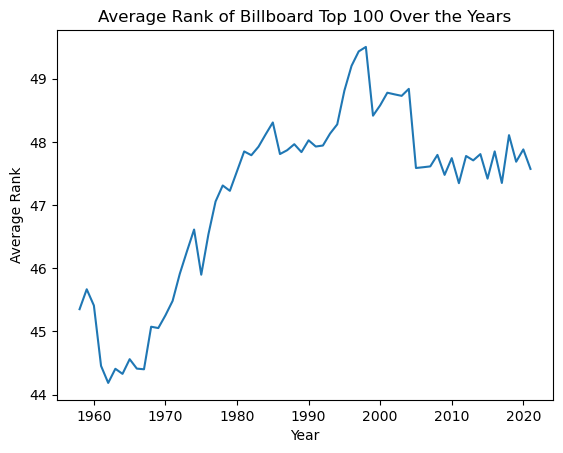

In [6]:
import matplotlib.pyplot as plt

# Example: Line plot of average rank by year
plt.plot(avg_rank_by_year.index, avg_rank_by_year.values)
plt.title('Average Rank of Billboard Top 100 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.show()


In [7]:
# Example: Top artists by the number of weeks on chart
top_artists = df.groupby('artist')['weeks_on_chart'].sum().nlargest(10)


In [8]:
import numpy as np

# Example: Mean and standard deviation of weeks on chart
mean_weeks = np.mean(df['weeks_on_chart'])
std_weeks = np.std(df['weeks_on_chart'])


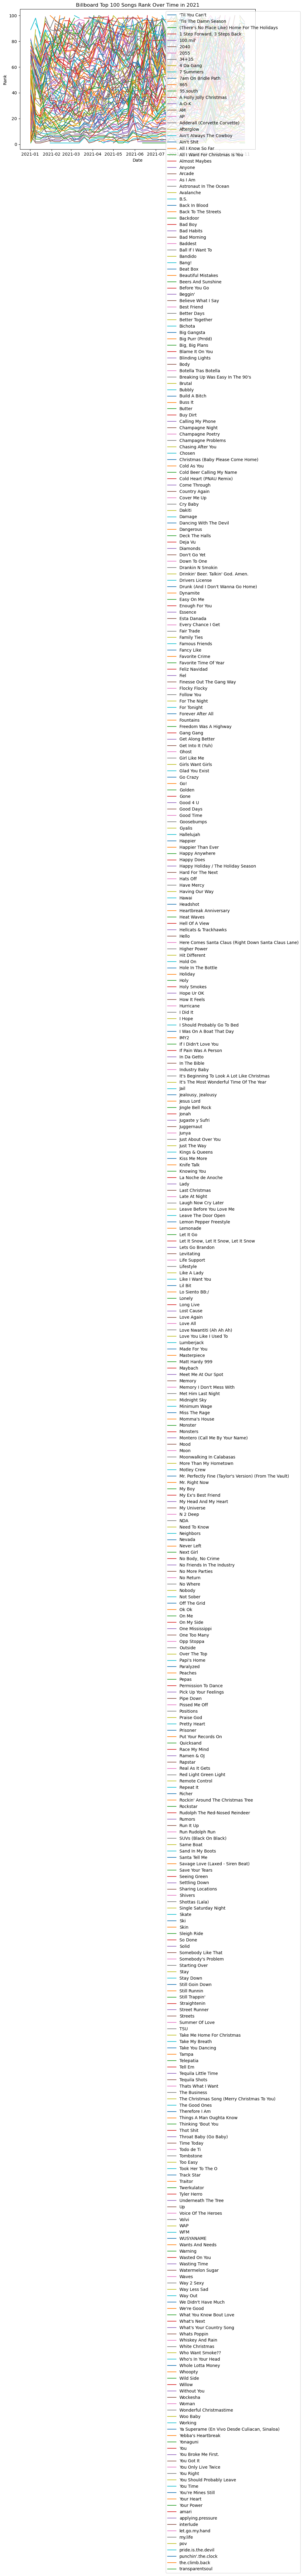

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for the year 2021
df_2021 = df[df['date'].dt.year == 2021]

# Plot the rank of songs over time in 2021
plt.figure(figsize=(10, 6))
for song, data in df_2021.groupby('song'):
    plt.plot(data['date'], data['rank'], label=song)

plt.title('Billboard Top 100 Songs Rank Over Time in 2021')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract decade from the 'date' column
df['decade'] = (df['date'].dt.year // 10) * 10

# Group data by decade and calculate the mean rank for each song
avg_rank_by_decade = df.groupby(['decade', 'song'])['rank'].mean().reset_index()

# Replace special characters in song names
avg_rank_by_decade['song'] = avg_rank_by_decade['song'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# Plot the average rank of songs by decade
plt.figure(figsize=(12, 8))
for song, data in avg_rank_by_decade.groupby('song'):
    plt.plot(data['decade'], data['rank'], label=song)

plt.title('Average Rank of Billboard Top 100 Songs by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rank')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


ValueError: Image size of 1184x469521 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract decade from the 'date' column
df['decade'] = (df['date'].dt.year // 10) * 10

# Group data by decade and calculate the mean rank for each song
avg_rank_by_decade = df.groupby(['decade', 'song'])['rank'].mean().reset_index()

# Replace special characters in song names
avg_rank_by_decade['song'] = avg_rank_by_decade['song'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# Plot the average rank of songs by decade
plt.figure(figsize=(10, 6))  # Adjusted figure size
for song, data in avg_rank_by_decade.groupby('song'):
    plt.plot(data['decade'], data['rank'], label=song)

plt.title('Average Rank of Billboard Top 100 Songs by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rank')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

ValueError: Image size of 998x469521 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract decade from the 'date' column
df['decade'] = (df['date'].dt.year // 10) * 10

# Filter data for years after 1999
df_filtered = df[df['date'].dt.year >= 2000]

# Group filtered data by decade and calculate the mean rank for each song
avg_rank_by_decade = df_filtered.groupby(['decade', 'song'])['rank'].mean().reset_index()

# Replace special characters in song names
avg_rank_by_decade['song'] = avg_rank_by_decade['song'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

# Plot the average rank of songs by decade
plt.figure(figsize=(10, 6))  # Adjusted figure size
for song, data in avg_rank_by_decade.groupby('song'):
    plt.plot(data['decade'], data['rank'], label=song)

plt.title('Average Rank of Billboard Top 100 Songs by Decade (After 1999)')
plt.xlabel('Decade')
plt.ylabel('Average Rank')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


ValueError: Image size of 998x133509 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

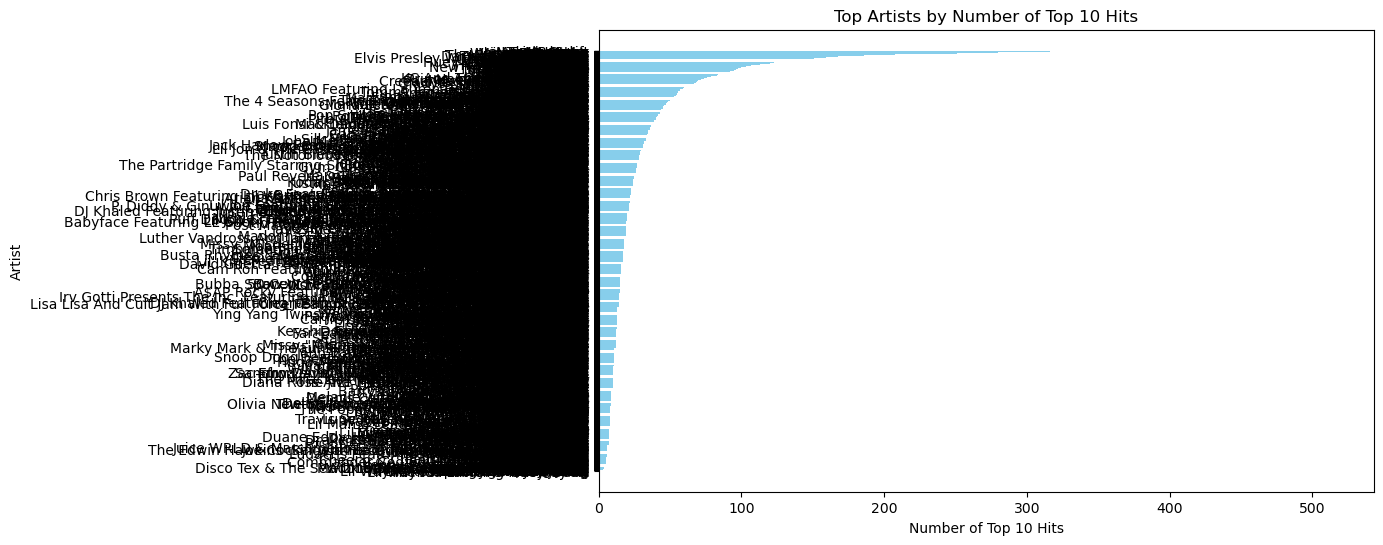

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter data for songs that reached top 10
top10_hits = df[df['peak_rank'] <= 10]

# Group data by artist and count the number of top 10 hits
top_artists = top10_hits['artist'].value_counts().reset_index()
top_artists.columns = ['Artist', 'Top 10 Hits']

# Sort the data by the number of top 10 hits
top_artists = top_artists.sort_values(by='Top 10 Hits', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_artists['Artist'], top_artists['Top 10 Hits'], color='skyblue')
plt.xlabel('Number of Top 10 Hits')
plt.ylabel('Artist')
plt.title('Top Artists by Number of Top 10 Hits')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


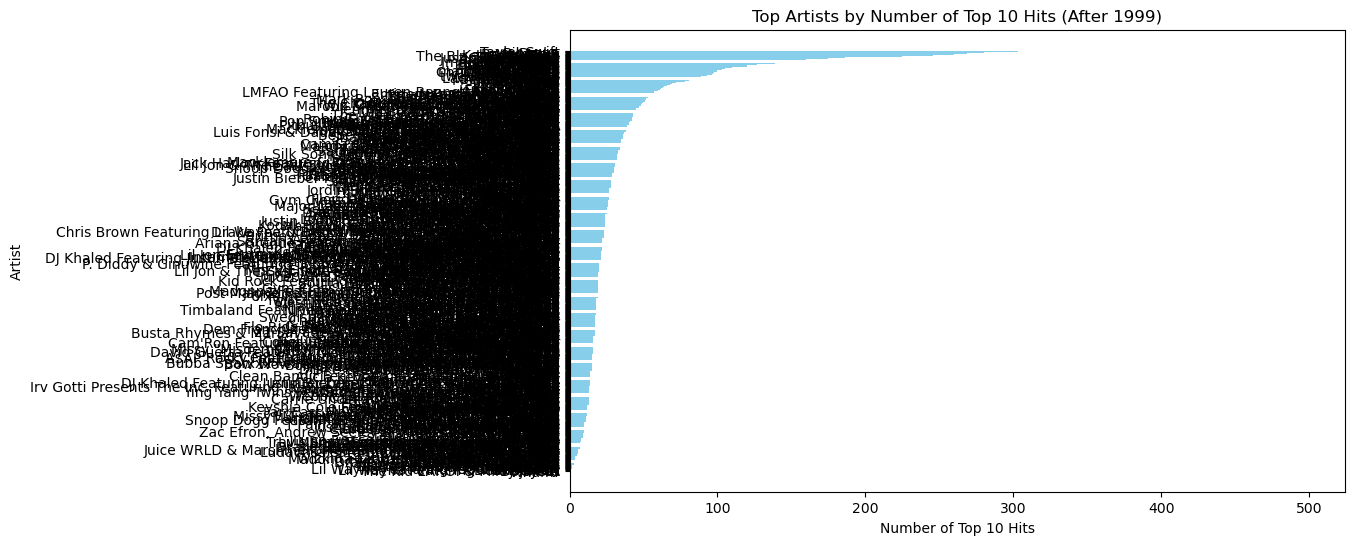

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for songs that reached top 10 and are after the year 2000
top10_hits = df[(df['peak_rank'] <= 10) & (df['date'].dt.year >= 2000)]

# Group data by artist and count the number of top 10 hits
top_artists = top10_hits['artist'].value_counts().reset_index()
top_artists.columns = ['Artist', 'Top 10 Hits']

# Sort the data by the number of top 10 hits
top_artists = top_artists.sort_values(by='Top 10 Hits', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_artists['Artist'], top_artists['Top 10 Hits'], color='skyblue')
plt.xlabel('Number of Top 10 Hits')
plt.ylabel('Artist')
plt.title('Top Artists by Number of Top 10 Hits (After 1999)')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()



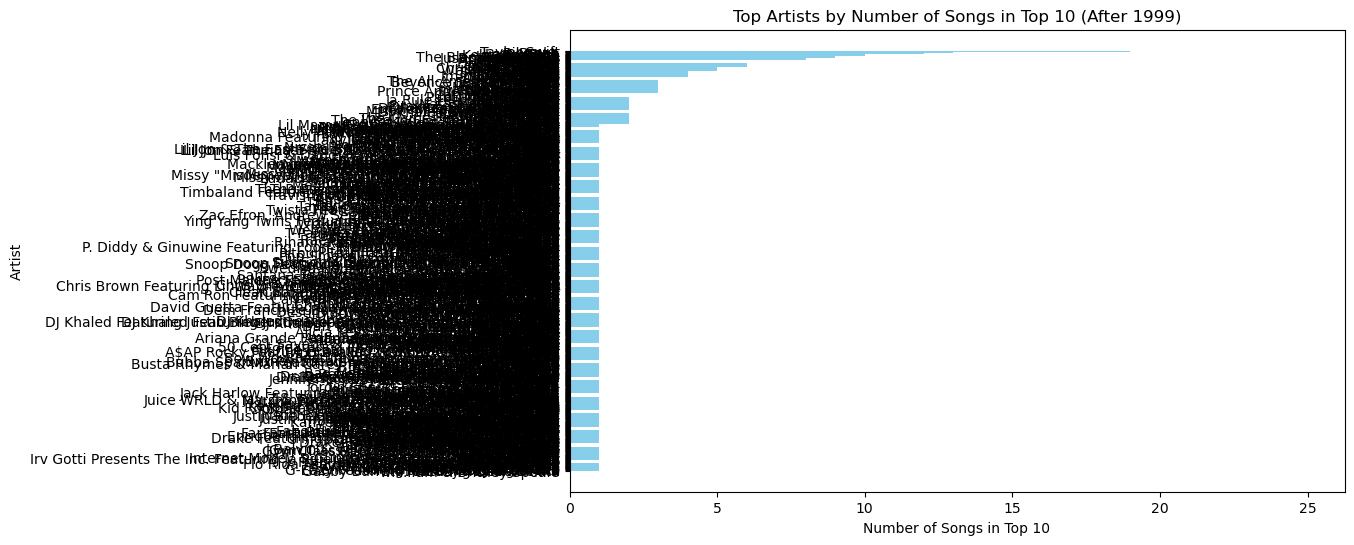

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for songs that reached top 10 and are after the year 2000
top10_hits = df[(df['peak_rank'] <= 10) & (df['date'].dt.year >= 2000)]

# Group data by artist and count the number of songs in the top 10
artist_song_count = top10_hits.groupby('artist')['song'].nunique().reset_index()
artist_song_count.columns = ['Artist', 'Number of Songs']

# Sort the data by the number of songs
artist_song_count = artist_song_count.sort_values(by='Number of Songs', ascending=False)

# Plot a horizontal bar chart for the top artists
plt.figure(figsize=(10, 6))
plt.barh(artist_song_count['Artist'], artist_song_count['Number of Songs'], color='skyblue')
plt.xlabel('Number of Songs in Top 10')
plt.ylabel('Artist')
plt.title('Top Artists by Number of Songs in Top 10 (After 1999)')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()
